## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables (`'RAD'` and `'TAX'`) and deleted the `'NOX'` (nitride oxide concentration) variable because it was highly correlated with two other features.

In [15]:
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# First, create bins for RAD based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# First, create bins for TAX based on the values observed. 6 values will result in 5 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix='TAX', drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix='RAD', drop_first=True)
boston_features = boston_features.drop(['RAD', 'TAX'], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop('NOX', axis=1)

## Look at the histograms for the continuous variables

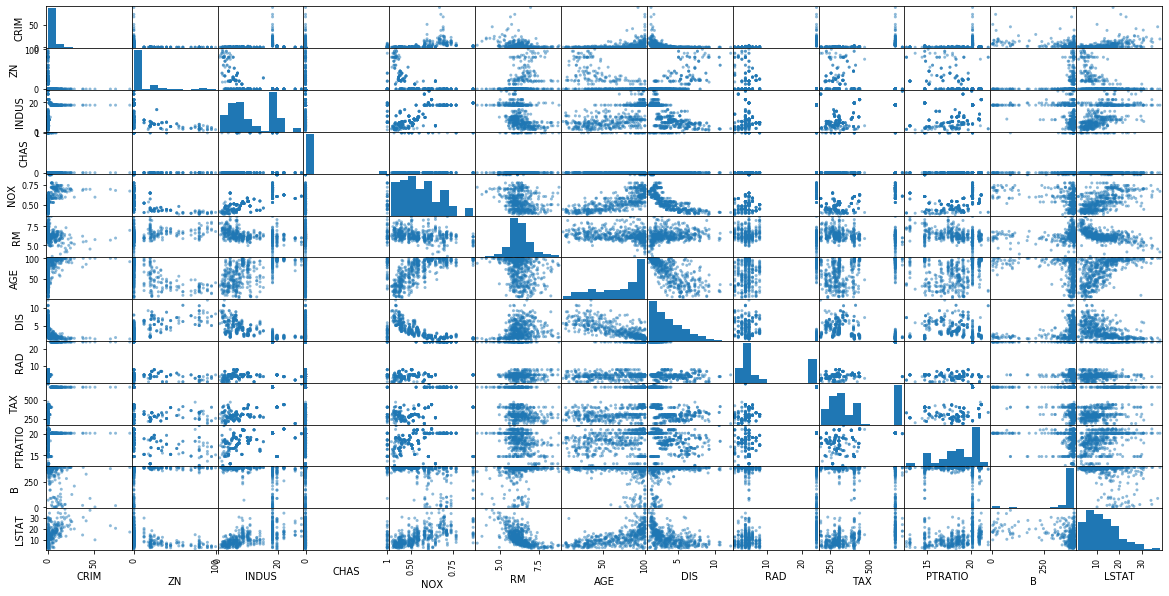

In [16]:
boston_features_cont = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_features_cont.drop(['TAX','RAD'],axis=1)
pd.plotting.scatter_matrix(boston_features_cont,figsize=(20,10))
plt.show()


## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the `'ZN'` feature?  

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


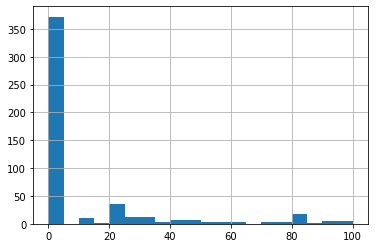

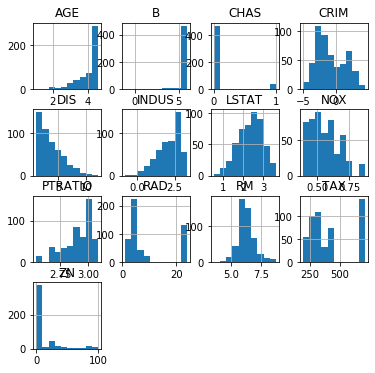

In [27]:
# Your code here
import numpy as np

newdf = boston_features_cont.copy()
print(boston_features['ZN'].describe())
print(boston_features['ZN'].hist(bins=20))

newdf['AGE']= np.log(boston_features['AGE'])
newdf['B']= np.log(boston_features['B'])
newdf['CRIM']= np.log(boston_features['CRIM'])
newdf['INDUS']= np.log(boston_features['INDUS'])
newdf['LSTAT']= np.log(boston_features['LSTAT'])
newdf['PTRATIO']= np.log(boston_features['PTRATIO'])

newdf.hist(figsize=[6,6])
plt.show()



`'ZN'` has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [28]:
# Your code here
bins2=[0,120]
bins_zn = pd.cut(boston_features['ZN'], bins2)
bins_zn = bins_zn.cat.as_unordered()
print(bins_zn.describe())


count          134
unique           1
top       (0, 120]
freq           134
Name: ZN, dtype: object


## Try different types of transformations on the continuous variables

Store your final features in a DataFrame `features_final`: 

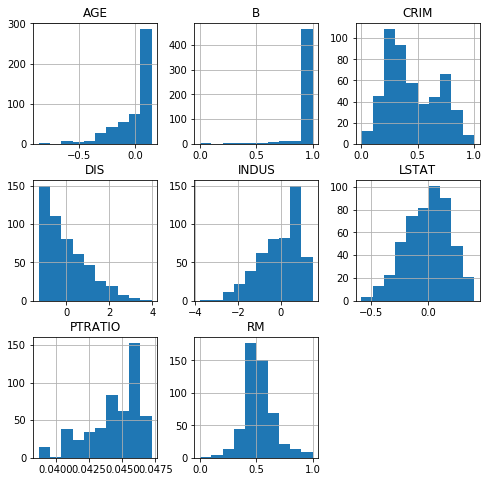

In [29]:
# Your code her
age = newdf['AGE']
b = newdf['B']
rm = newdf['RM']
logcrim = newdf['CRIM'] 
logdis = newdf['DIS']  
logindus = newdf['INDUS'] 
loglstat = newdf['LSTAT']
logptratio = newdf['PTRATIO']

features_final= pd.DataFrame([])

features_final['CRIM'] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))
features_final['B'] = (b-min(b))/(max(b)-min(b))
features_final['RM'] = (rm-min(rm))/(max(rm)-min(rm))
features_final['DIS']   = (logdis-np.mean(logdis))/np.sqrt(np.var(logdis))
features_final['INDUS'] = (logindus-np.mean(logindus))/np.sqrt(np.var(logindus))
features_final['LSTAT'] = (loglstat-np.mean(loglstat))/(max(loglstat)-min(loglstat))
features_final['AGE'] = (age-np.mean(age))/(max(age)-min(age))
features_final['PTRATIO'] = (logptratio)/(np.linalg.norm(logptratio))

features_final.hist(figsize  = [8, 8]);



## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!